In [25]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# The code was removed by Watson Studio for sharing.

,TeamA,TeamB,ATotalPts,APtsLast5Games,AGoalsScoredL5,AGoalsConceededL5,APtsLast2HGames,AMatchNo,BTotalPts,BPtsLast5Games,BGoalsScoredL5,BGoalsConceededL5,BPtsLast2AGames,BMatchNo,Result
0,Southampton,Bournemouth,7,7,5,-6,1,6,-7,-7,-5,9,-3,-6,-1
1,NewcastleUnited,BrightonandHoveAlbion,4,4,4,-8,1,6,-5,-5,-4,8,-3,-6,0
2,ManchesterCity,Watford,10,10,16,-6,4,6,-2,-2,-16,10,-1,-6,1
3,Everton,SheffieldUnited,7,7,5,-7,6,6,-5,-5,-5,6,-2,-6,-1
4,Burnley,NorwichCity,5,5,6,-7,3,6,-6,-6,-6,12,0,-6,1


In [70]:
Y = df_data_1['Result'].to_numpy()
Y[0:5]

array([-1,  0,  1, -1,  1])

In [29]:
X = df_data_1
X.drop('Result', inplace=True, axis=1)
X.head()

,TeamA,TeamB,ATotalPts,APtsLast5Games,AGoalsScoredL5,AGoalsConceededL5,APtsLast2HGames,AMatchNo,BTotalPts,BPtsLast5Games,BGoalsScoredL5,BGoalsConceededL5,BPtsLast2AGames,BMatchNo
0,Southampton,Bournemouth,7,7,5,-6,1,6,-7,-7,-5,9,-3,-6
1,NewcastleUnited,BrightonandHoveAlbion,4,4,4,-8,1,6,-5,-5,-4,8,-3,-6
2,ManchesterCity,Watford,10,10,16,-6,4,6,-2,-2,-16,10,-1,-6
3,Everton,SheffieldUnited,7,7,5,-7,6,6,-5,-5,-5,6,-2,-6
4,Burnley,NorwichCity,5,5,6,-7,3,6,-6,-6,-6,12,0,-6


In [30]:
X.drop('TeamA', inplace=True, axis=1)
X.drop('TeamB', inplace=True, axis=1)
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)
X[0:5]

array([[-1.27613438,  0.13682231, -0.4320905 ,  0.23281366, -1.09274901,
        -1.6803361 ,  1.27077557, -0.00989535,  0.4320905 ,  0.84649337,
        -0.42165149,  1.6803361 ],
       [-1.45282991, -0.77226553, -0.72669766, -0.44408948, -1.09274901,
        -1.6803361 ,  1.38587258,  0.58382552,  0.72669766,  0.51034077,
        -0.42165149,  1.6803361 ],
       [-1.09943885,  1.04591015,  2.80858827,  0.23281366,  0.45936221,
        -1.6803361 ,  1.55851809,  1.47440683, -2.80858827,  1.18264597,
         0.64052402,  1.6803361 ],
       [-1.27613438,  0.13682231, -0.4320905 , -0.10563791,  1.49410302,
        -1.6803361 ,  1.38587258,  0.58382552,  0.4320905 , -0.16196444,
         0.10943626,  1.6803361 ],
       [-1.3939314 , -0.46923625, -0.13748334, -0.10563791, -0.0580082 ,
        -1.6803361 ,  1.32832408,  0.28696509,  0.13748334,  1.85495117,
         1.17161178,  1.6803361 ]])

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, random_state=2)

In [32]:
Y_test.shape

(33,)

LOGISTIC REGRESSION

In [33]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, refit = True, cv = 10, verbose = 3,n_jobs=-1) 
logreg_cv.fit(X_train, Y_train) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             verbose=3)

In [34]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.49160919540229886


In [35]:
logreg2=LogisticRegression(C=0.01,penalty="l2", solver="lbfgs")
logreg2.fit(X_train,Y_train)
print("score",logreg2.score(X_test,Y_test))

score 0.48484848484848486


DECISION TREE CLASSIFIER

In [36]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [37]:
tree_cv = GridSearchCV(tree, parameters, refit = True, cv = 10, verbose = 3,n_jobs=-1) 
tree_cv.fit(X_train, Y_train) 

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
[CV]  C=1000.0, gamma=31.622776601683793, kernel=linear, score=0.552, total=  39.5s
[CV] C=1000.0, gamma=31.622776601683793, kernel=linear ...............
[CV]  C=1000.0, gamma=31.622776601683793, kernel=linear, score=0.448, total=  53.4s
[CV] C=1000.0, gamma=1000.0, kernel=linear ...........................
[CV]  C=1000.0, gamma=1000.0, kernel=linear, score=0.400, total=  33.7s
[CV] C=1000.0, gamma=1000.0, kernel=linear ...........................
[CV]  C=1000.0, gamma=1000.0, kernel=linear, score=0.567, total=  47.1s
[CV] C=1000.0, gamma=1000.0, kernel=linear ...........................
[CV]  C=1000.0, gamma=1000.0, kernel=linear, score=0.400, total=  35.0s
[CV] C=1000.0, gamma=1000.0, kernel=linear ...........................
[CV]  C=1000.0, gamma=1000.0, kernel=linear, score=0.552, total=  35.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.4

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random, score=0.467, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random, score=0.300, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random, score=0.517, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random, score=0.483, total=

[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    0.4s


[CV] criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random, score=0.448, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random, score=0.414, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best, score=0.367, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best, score=0.333, total=   0.0s
[CV] cri

[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:    4.2s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [38]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.4847126436781609


In [39]:
tree2=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2, splitter= 'best')
tree2.fit(X_train,Y_train)
print("score",tree2.score(X_test,Y_test))

score 0.3333333333333333


In [80]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['won', 'drew','lost']); ax.yaxis.set_ticklabels(['won', 'drew','lost'])

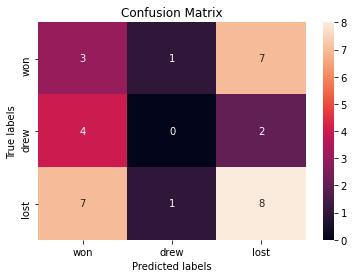

In [41]:
yhat = tree2.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

K NEAREST NEIGHBORS

In [17]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [18]:
knn_cv = GridSearchCV(KNN, parameters, refit = True, cv = 10, verbose = 3,n_jobs=-1) 
knn_cv.fit(X_train, Y_train) 

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.333, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.400, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.333, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.300, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.500, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.200, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.517, total=   0.0s
[CV] a

[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    0.8s


[CV] .. algorithm=auto, n_neighbors=7, p=1, score=0.433, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=7, p=1, score=0.483, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=7, p=1, score=0.517, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=7, p=1, score=0.483, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=7, p=2, score=0.300, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=7, p=2, score=0.333, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=7, p=2, score=0.533, total=   0.0s
[CV] algorithm=auto, n_neighbors=7, p=2 ..............................
[CV] .

[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.8s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             verbose=3)

In [19]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 2}
accuracy : 0.4183908045977011


In [20]:
knn2=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 6, p= 2)
knn2.fit(X_train,Y_train)
print("score",knn2.score(X_test,Y_test))

score 0.45454545454545453


SUPPORT VECTOR MACHINE

Having issues with SVM

# TRYING FEATURES COMBINATION

In [65]:
X = df_data_1
X.drop('Result', inplace=True, axis=1)
X.drop('TeamA', inplace=True, axis=1)
X.drop('TeamB', inplace=True, axis=1)
X.drop('AMatchNo', inplace=True, axis=1)
X.drop('BMatchNo', inplace=True, axis=1)
X.head()

,ATotalPts,APtsLast5Games,AGoalsScoredL5,AGoalsConceededL5,APtsLast2HGames,BTotalPts,BPtsLast5Games,BGoalsScoredL5,BGoalsConceededL5,BPtsLast2AGames
0,7,7,5,-6,1,-7,-7,-5,9,-3
1,4,4,4,-8,1,-5,-5,-4,8,-3
2,10,10,16,-6,4,-2,-2,-16,10,-1
3,7,7,5,-7,6,-5,-5,-5,6,-2
4,5,5,6,-7,3,-6,-6,-6,12,0


In [66]:
X['TotalPts']=X['ATotalPts']/(X['BTotalPts']*-1+.1)
X['PtsLast5Games']=X['APtsLast5Games']/(X['BPtsLast5Games']*-1+.1)
X = X[['TotalPts','PtsLast5Games','APtsLast2HGames','BPtsLast2AGames']].copy()
X.head()

,TotalPts,PtsLast5Games,APtsLast2HGames,BPtsLast2AGames
0,0.985915,0.985915,1,-3
1,0.784314,0.784314,1,-3
2,4.761905,4.761905,4,-1
3,1.372549,1.372549,6,-2
4,0.819672,0.819672,3,0


In [67]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)
X[0:5]

array([[-0.21876202, -0.13783603, -1.09274901, -0.42165149],
       [-0.52213981, -0.15880193, -1.09274901, -0.42165149],
       [ 5.46348619,  0.25485403,  0.45936221,  0.64052402],
       [ 0.3630584 , -0.09762746,  1.49410302,  0.10943626],
       [-0.46893117, -0.15512478, -0.0580082 ,  1.17161178]])

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, random_state=2)

LOGISTIC REGRESSION 2ND TRIAL

In [72]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, refit = True, cv = 10, verbose = 3,n_jobs=-1) 
logreg_cv.fit(X_train, Y_train) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             verbose=3)

In [73]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.5252873563218391


In [74]:
logreg2=LogisticRegression(C=0.1,penalty="l2", solver="lbfgs")
logreg2.fit(X_train,Y_train)
print("score",logreg2.score(X_test,Y_test))

score 0.48484848484848486
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.433, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.567, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.500, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.483, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.517, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.533, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0

DECISION TREE CLASSIFIER 2ND TRIAL

In [75]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [76]:
tree_cv = GridSearchCV(tree, parameters, refit = True, cv = 10, verbose = 3,n_jobs=-1) 
tree_cv.fit(X_train, Y_train) 

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.467, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.567, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.633, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best, score=0.500, total=   0.0s
[CV] criterion=g

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.8s


[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.433, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.483, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.448, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random, score=0.483, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best 
[

[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:    4.8s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [77]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.5387356321839081


In [79]:
tree2=DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 10, splitter= 'best')
tree2.fit(X_train,Y_train)
print("score",tree2.score(X_test,Y_test))

score 0.5151515151515151


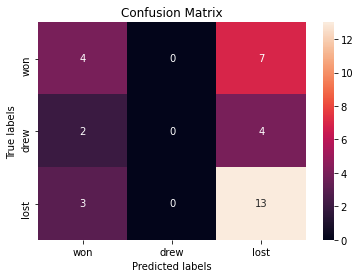

[CV]  criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best, score=0.233, total=   0.0s
[CV] criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best 
[CV]  criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best, score=0.379, total=   0.0s
[CV] criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best, score=0.433, total=   0.0s
[CV] criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best 
[CV]  criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best, score=0.467, total=   0.0s
[CV] criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split

In [81]:
yhat = tree2.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [82]:
yhat[0:30]

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1])

In [83]:
Y_test[0:30]

array([ 1,  1,  1,  0,  1,  1,  1,  1, -1,  0,  1,  1,  0,  0, -1, -1,  1,
       -1,  0, -1, -1,  1, -1,  0,  1, -1, -1,  1, -1,  1])

CONCLUSION

It's indeed very difficult to predict the results of soccer matches. Maybe a better feature engineering approach will make it easier, I don't know. The fact that there are three possible outcomes for every soccer match makes prediction   